In [1]:
import pandas as pd
import numpy as np

In [2]:
heartClassificationData = pd.read_csv('heart disease classification dataset.csv')
#print(heartClassificationData)
heartClassificationData.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


In [3]:
heartClassificationData.isnull().sum()

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      4
chol          1
fbs           0
restecg       0
thalach       5
exang         0
oldpeak       0
slope         0
ca            0
thal          0
target        0
dtype: int64

In [4]:
heartClassificationDataNew1 = heartClassificationData.drop('Unnamed: 0',axis = 1)
print(heartClassificationDataNew1.shape)

(303, 14)


In [5]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values=np.nan, strategy='mean')

impute.fit(heartClassificationDataNew1[['trestbps']])


heartClassificationDataNew1['trestbps'] = impute.transform(heartClassificationDataNew1[['trestbps']])

In [6]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values=np.nan, strategy='mean')

impute.fit(heartClassificationDataNew1[['thalach']])

heartClassificationDataNew1['thalach'] = impute.transform(heartClassificationDataNew1[['thalach']])

In [7]:
#heartClassificationDataNew1 = heartClassificationDataNew1.drop('Unnamed: 0',axis = 1)

In [8]:
heartClassificationDataNew1.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        1
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values=np.nan, strategy='mean')

impute.fit(heartClassificationDataNew1[['chol']])

heartClassificationDataNew1['chol'] = impute.transform(heartClassificationDataNew1[['chol']])

In [10]:
from sklearn.preprocessing import LabelEncoder

changing = LabelEncoder()

heartClassificationDataNew1['sex'] = changing.fit_transform(heartClassificationDataNew1['sex'])

print(heartClassificationDataNew1[['sex']].head())

   sex
0    1
1    1
2    0
3    1
4    0


In [11]:
from sklearn.preprocessing import LabelEncoder

changing = LabelEncoder()

heartClassificationDataNew1['target'] = changing.fit_transform(heartClassificationDataNew1['target'])

print(heartClassificationDataNew1[['target']].head())

   target
0       1
1       1
2       1
3       1
4       1


In [12]:
heartClassificationDataNew1.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x = heartClassificationDataNew1.drop(columns='target',axis=1)
y = heartClassificationDataNew1['target'] 

In [15]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int32


In [16]:
print(x)

     age  sex  cp    trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3  145.000000  233.0    1        0    150.0      0      2.3   
1     37    1   2  130.000000  250.0    0        1    187.0      0      3.5   
2     41    0   1  130.000000  204.0    0        0    172.0      0      1.4   
3     56    1   1  120.000000  236.0    0        1    178.0      0      0.8   
4     57    0   0  131.712375  354.0    0        1    163.0      1      0.6   
..   ...  ...  ..         ...    ...  ...      ...      ...    ...      ...   
298   57    0   0  140.000000  241.0    0        1    123.0      1      0.2   
299   45    1   3  110.000000  264.0    0        1    132.0      0      1.2   
300   68    1   0  144.000000  193.0    1        1    141.0      0      3.4   
301   57    1   0  131.712375  131.0    0        1    115.0      1      1.2   
302   57    0   1  130.000000  236.0    0        0    174.0      0      0.0   

     slope  ca  thal  
0        0   0     1  
1    

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)

(242, 13)
(61, 13)


In [18]:
from sklearn.preprocessing import MinMaxScaler

scalingDataset = MinMaxScaler()

scalingDataset.fit(X_train)

MinMaxScaler()

In [19]:
X_train_scaled = scalingDataset.transform(X_train)

In [20]:
X_test_scaled = scalingDataset.transform(X_test)

**Support Vector Machine (SVM)**

In [21]:
from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [22]:
print("Training accuracy of the model is {:.2f}".format(svc.score(X_train, y_train)))
print("Testing accuracy of the model is {:.2f}".format(svc.score(X_test, y_test)))

Training accuracy of the model is 0.86
Testing accuracy of the model is 0.72


In [23]:
pre_svm_accuracy = svc.score(X_test,y_test)
print(pre_svm_accuracy)

0.7213114754098361


In [24]:
predictions = svc.predict(X_test)
print(predictions)

[0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0
 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0]


In [25]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(predictions, y_test)
print(mat)

[[20  7]
 [10 24]]


<AxesSubplot:>

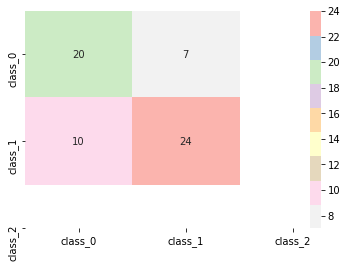

In [26]:
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", xticklabels=['class_0' ,'class_1' ,'class_2'], yticklabels=['class_0' ,'class_1', 'class_2'], annot=True)

**Random Forest**

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [28]:
print("The Training accuracy of the model is {:.2f}".format(rfc.score(X_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(rfc.score(X_test, y_test)))

The Training accuracy of the model is 1.00
The Testing accuracy of the model is 0.75


In [29]:
pre_rfc_accuracy =rfc.score(X_test,y_test)
print(pre_rfc_accuracy)

0.7540983606557377


In [30]:
predictions = rfc.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(predictions, y_test)
print(mat)

[[20  5]
 [10 26]]


<AxesSubplot:>

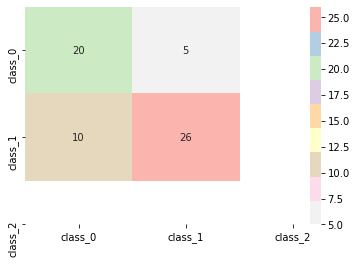

In [32]:
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", xticklabels=['class_0' ,'class_1' ,'class_2'], yticklabels=['class_0' ,'class_1', 'class_2'], annot=True)

**Neural Network (Multilayer Perceptron Classifier)**

In [33]:
from sklearn.neural_network import MLPClassifier
neuralNetworkClassifier=MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000)

In [34]:
neuralNetworkClassifier.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=7, max_iter=10000)

In [35]:
print("The Training accuracy of the model is {:.2f}".format(neuralNetworkClassifier.score(X_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(neuralNetworkClassifier.score(X_test, y_test)))

The Training accuracy of the model is 0.45
The Testing accuracy of the model is 0.49


In [36]:
pre_nnc_accuracy = neuralNetworkClassifier.score(X_test,y_test)
print(pre_nnc_accuracy)

0.4918032786885246


In [37]:
predictions = neuralNetworkClassifier.predict(X_test)
print(predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [38]:
from sklearn.metrics import confusion_matrix
matrix_NNC=confusion_matrix(predictions, y_test)
print(matrix_NNC)

[[30 31]
 [ 0  0]]


<AxesSubplot:>

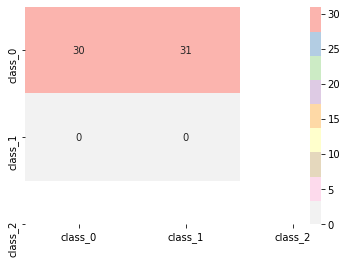

In [39]:
from seaborn import heatmap
heatmap(matrix_NNC , cmap="Pastel1_r", xticklabels=['class_0' ,'class_1' ,'class_2'], yticklabels=['class_0' ,'class_1', 'class_2'], annot=True)

**performance with dimensionality reduction**


In [40]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [41]:
heartClassificationDataNew1.keys()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [42]:
heartClassificationDataNew1.shape

(303, 14)

In [43]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=7)

In [44]:
principal_components= pca.fit_transform(heartClassificationDataNew1)
print(principal_components)

[[-1.23143404e+01  2.83660520e+00  1.49567200e+01 ... -3.36697875e-01
   2.69134243e+00  2.51464222e-01]
 [ 2.39374903e+00 -3.97381838e+01 -2.10546755e-01 ...  2.39599035e+00
   2.65596690e+00 -2.39762010e-01]
 [-4.31461193e+01 -2.32310293e+01  1.05911583e+00 ...  3.59735044e-01
   3.52037671e-01 -4.40063823e-01]
 ...
 [-5.19484435e+01  1.35545105e+01  1.57413716e+01 ...  2.50145601e+00
   6.65035250e-02 -1.32738880e-01]
 [-1.14496941e+02  3.74955724e+01  2.55117351e+00 ...  2.06253233e-01
  -7.81821927e-01 -3.84944373e-01]
 [-1.06047052e+01 -2.30381090e+01  1.77555275e+00 ...  6.01452707e-02
  -6.30196270e-01  2.49283327e-02]]


In [45]:
pca.explained_variance_ratio_

array([7.52762769e-01, 1.44227686e-01, 8.53545836e-02, 1.63383344e-02,
       4.03376020e-04, 2.85938594e-04, 2.30152137e-04])

In [46]:
sum(pca.explained_variance_ratio_)

0.9996028400787978

In [47]:
principal_df = pd.DataFrame(data=principal_components, columns=["principle component 1", "principle component 2","principle component 3","principle component 4","principle component 5","principle component 6","principle component 7"])
#principal_df.head()
main_df=pd.concat([principal_df, heartClassificationDataNew1[['target']]], axis=1)

In [48]:
main_df.head()

,principle component 1,principle component 2,principle component 3,principle component 4,principle component 5,principle component 6,principle component 7,target
0,-12.314340,2.836605,14.956720,6.773855,-0.336698,2.691342,0.251464,1
1,2.393749,-39.738184,-0.210547,-10.416866,2.395990,2.655967,-0.239762,1
2,-43.146119,-23.231029,1.059116,-7.748031,0.359735,0.352038,-0.440064,1
3,-11.185782,-27.951015,-7.773746,8.463478,0.044467,0.157199,-0.690657,1
4,107.385742,-15.040514,-3.792782,1.663424,-0.392592,-0.574847,-1.204735,1


In [49]:
X= main_df.drop("target" , axis=1)
y= main_df["target"]

In [50]:
x_train, x_test, Y_train, Y_test = train_test_split(X , y , test_size=0.2, random_state=42)

In [51]:
main_df.isnull().sum()

principle component 1    0
principle component 2    0
principle component 3    0
principle component 4    0
principle component 5    0
principle component 6    0
principle component 7    0
target                   0
dtype: int64

In [52]:
from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(x_train, Y_train)

SVC(kernel='linear')

In [53]:
print("Training accuracy of the model is {:.2f}".format(svc.score(x_train, Y_train)))
print("Testing accuracy of the model is {:.2f}".format(svc.score(x_test, Y_test)))

Training accuracy of the model is 0.84
Testing accuracy of the model is 0.87


In [54]:
post_svm_accuracy = svc.score(x_test,Y_test)
print(post_svm_accuracy)

0.8688524590163934


In [55]:
predictions = svc.predict(x_test)
print(predictions)

[0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1
 1 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0]


In [56]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(predictions, Y_test)
print(mat)

[[26  5]
 [ 3 27]]


<AxesSubplot:>

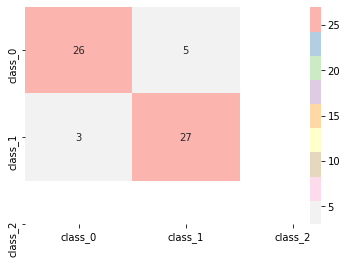

In [57]:
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", xticklabels=['class_0' ,'class_1' ,'class_2'], yticklabels=['class_0' ,'class_1', 'class_2'], annot=True)

In [58]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(x_train, Y_train)

RandomForestClassifier(n_estimators=50)

In [59]:
print("The Training accuracy of the model is {:.2f}".format(rfc.score(x_train, Y_train)))
print("The Testing accuracy of the model is {:.2f}".format(rfc.score(x_test, Y_test)))

The Training accuracy of the model is 1.00
The Testing accuracy of the model is 0.82


In [60]:
post_rfc_accuracy = rfc.score(x_test,Y_test)
print(post_rfc_accuracy)

0.819672131147541


In [61]:
predictions = rfc.predict(x_test)

In [62]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(predictions, Y_test)
print(mat)

[[24  6]
 [ 5 26]]


<AxesSubplot:>

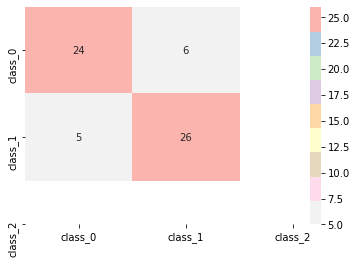

In [63]:
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", xticklabels=['class_0' ,'class_1' ,'class_2'], yticklabels=['class_0' ,'class_1', 'class_2'], annot=True)

In [64]:
from sklearn.neural_network import MLPClassifier
nnc=MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000)

In [65]:
nnc.fit(x_train, Y_train)

MLPClassifier(hidden_layer_sizes=7, max_iter=10000)

In [66]:
print("The Training accuracy of the model is {:.2f}".format(nnc.score(x_train, Y_train)))
print("The Testing accuracy of the model is {:.2f}".format(nnc.score(x_test, Y_test)))

The Training accuracy of the model is 0.83
The Testing accuracy of the model is 0.87


In [67]:
post_nnc_accuracy = nnc.score(x_test,Y_test)
print(post_nnc_accuracy)

0.8688524590163934


In [68]:
predictions = nnc.predict(x_test)
print(predictions)

[0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0
 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0]


In [69]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(predictions, y_test)
print(mat)

[[13 16]
 [17 15]]


<AxesSubplot:>

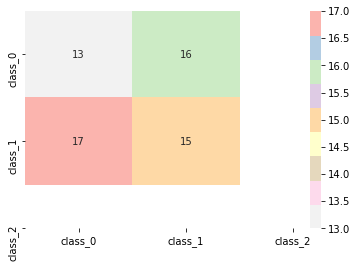

In [70]:
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", xticklabels=['class_0' ,'class_1' ,'class_2'], yticklabels=['class_0' ,'class_1', 'class_2'], annot=True)

In [71]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
# import seaborn as sns
# post=0
# pre=1
# accuracy = [post,post, post,pre,pre,pre]
# post_pca_accuracy = [post_svm_accuracy, post_rfc_accuracy,post_nnc_accuracy,pre_svm_accuracy,pre_rfc_accuracy,pre_nnc_accuracy]
# models = ['postSac','postRac','postNac','preSac','preRac','preNac']
# df = pd.DataFrame({'accuracy': accuracy,
#                     'post_pca_accuracy': post_pca_accuracy,
#                   "Models": models})

# sns.barplot(x="Models", y="post_pca_accuracy", hue="accuracy", data=df)

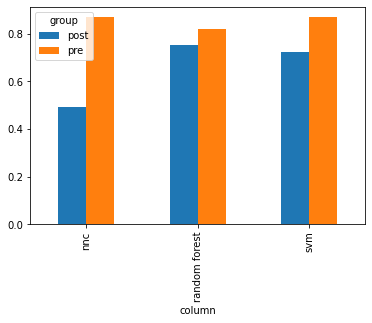

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame([['post','svm',pre_svm_accuracy],['post','nnc',pre_nnc_accuracy],['post','random forest',pre_rfc_accuracy],['pre','svm',post_svm_accuracy],
                   ['pre','nnc',post_nnc_accuracy],['pre','random forest',post_rfc_accuracy]],columns=['group','column','val'])

df.pivot("column", "group", "val").plot(kind='bar')

plt.show()